<a href="https://colab.research.google.com/github/maxigaarp/Gestion-De-Datos-en-R/blob/main/Taller_2_Gesti%C3%B3n_de_datos_v2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller 2**

En este taller repasaremos lo aprendido en el primer taller en diagramas de flujo y visualizando información, aprenderemos sobre la unión de diferentes bases de datos y prepararemos la primera tarea del ramo.

## **Repaso estructuras condicionales (Actividad)**

Las estructuras condicionales comparan una variable contra otro(s)valor (es), para que en base al resultado de esta comparación, se siga un curso de acción dentro del programa.

Las estructuras más usuales son 

*   Condicionales: if, else 







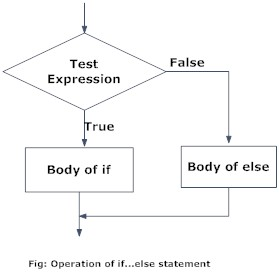


*   Ciclicas: for, while, repeat

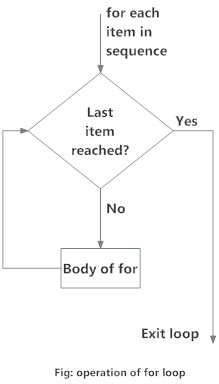

*   Control: next, break

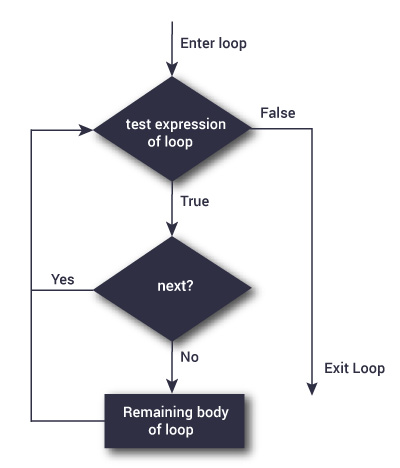

**Actividad**

Escriba un algoritmo y su diagrama de flujo para el siguiente problema:

Tiene una base de datos de estudiantes pertenecientes a un curso, junto con su promedio en distintas asignaturas (Matemáticas, Lenguaje, Inglés, Música y Deporte). Usted desea calcular el promedio final de los alumnos y asignarle una clasificación, que puede ser "alumno de excelencia" si el promedio es mayor a 6,5, "Sobre el promedio" si su promedio es mayor (o igual) al promedio de curso, pero menor (o igual) que 6,5, y "bajo el promedio" para todos los estudiantes que tengan nota estrictamente inferior al promedio. Una vez realizada la asignación, cuente cuantos estudiantes pertenecen a cada categoría. Ojo, que hay alumnos en la base de datos que no tienen notas en todos los ramos, a ellos no debe asignarle categoría.

In [ ]:
curso <- data.frame(
  nombre = c("Juan", "María", "Conni", "Max", "Francisco", "Pablo", "Catalina", "Ángela"),
  matematicas = c(6.3, 6.5, 5.7, 6.8, 4.6, 5.5, 6.1, 6.2),
  lenguaje = c( 6.5, 5, 5.9, 7, 5.3, 6.1, 5.5, 5.7 ),
  ingles = c( 6, 6.3, 5.9, 7, 4.5, 6, 6.1, 6.6),
  musica = c( 7, 6.3, 6.3, 6.4, 5.5, 6.1, NA , 6 ),
  deportes = c( 6.8, 6.9, 6.6, 6.8, 5.4, 6, 6.9, 4.9 )
)

In [ ]:
curso

nombre,matematicas,lenguaje,ingles,musica,deportes
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Juan,6.3,6.5,6.0,7.0,6.8
María,6.5,5.0,6.3,6.3,6.9
Conni,5.7,5.9,5.9,6.3,6.6
Max,6.8,7.0,7.0,6.4,6.8
Francisco,4.6,5.3,4.5,5.5,5.4
Pablo,5.5,6.1,6.0,6.1,6.0
Catalina,6.1,5.5,6.1,NA,6.9
Ángela,6.2,5.7,6.6,6.0,4.9


In [ ]:
# Crear el código
curso$promedio <- NA
curso$clasificacion <- NA

for(i in seq(1:length(curso))){

  if( is.na(curso$matematicas[i]) | is.na(curso$lenguaje[i])| is.na(curso$ingles[i])| is.na(curso$musica[i])| is.na(curso$deportes[i])){
    next
  }
  curso$promedio[i] <- (curso$matematicas[i] + curso$lenguaje[i] + curso$ingles[i] + curso$musica[i] + curso$deportes[i]) / 5
}


for(i in seq(1:length(curso))){
  if( is.na(curso$promedio[i])){
    next
  }
  if( curso$promedio[i] > 6.5){
    curso$clasificacion[i] = "alumno de excelencia" 
  }
  if( curso$promedio[i] <= 6.5 & curso$promedio[i] >= mean(curso$promedio, na.rm = TRUE)){
    curso$clasificacion[i] = "sobre el promedio" 
  }
  if( curso$promedio[i] < mean(curso$promedio, na.rm = TRUE)){
    curso$clasificacion[i] = "bajo el promedio" 
  }
}




In [ ]:
library(tidyverse)
Agrupado <- curso %>% group_by(clasificacion)
data_resumen <- Agrupado %>% summarise(n = n())
data_resumen

clasificacion,n
<chr>,<int>
alumno de excelencia,2
bajo el promedio,3
sobre el promedio,2
NA,1


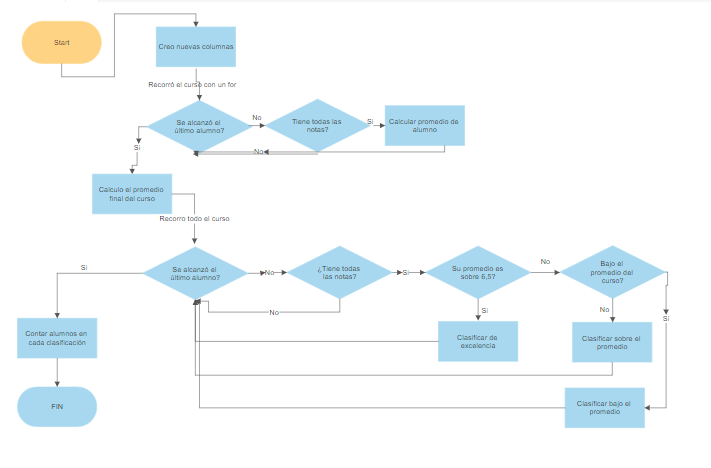

## Repaso visualización de información

Tenemos la base de datos de rendimiento de todos los niveles para un año especifico. Carguen la base de datos del año 2020 y asignenla a "rendim2020"

In [ ]:
install.packages("data.table")
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [ ]:
system("gdown https://drive.google.com/uc?id=1q089qSqKr7Ak29lUkzKSWjm2pcb_jzX0")
system("gdown https://drive.google.com/uc?id=17zq3NBv39yNEIY2WvCp-eE2KWz81aelj")

In [ ]:
unzip("/content/notas_egresados.zip")
unzip("/content/matriculas_y_notas_anual.zip")


In [ ]:
rendim2020 <- fread("/content/content/Datos/20210223_Rendimiento_2020.csv")

In [ ]:
#vistazo rapido centrandose en las columnas
str(rendim2020)

Classes ‘data.table’ and 'data.frame':	3164534 obs. of  37 variables:
 $ AGNO          : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ RBD           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DGV_RBD       : int  9 9 9 9 9 9 9 9 9 9 ...
 $ NOM_RBD       : chr  "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" ...
 $ COD_REG_RBD   : int  15 15 15 15 15 15 15 15 15 15 ...
 $ NOM_REG_RBD_A : chr  "AYP" "AYP" "AYP" "AYP" ...
 $ COD_PRO_RBD   : int  151 151 151 151 151 151 151 151 151 151 ...
 $ COD_COM_RBD   : int  15101 15101 15101 15101 15101 15101 15101 15101 15101 15101 ...
 $ NOM_COM_RBD   : chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPROV_RBD: int  151 151 151 151 151 151 151 151 151 151 ...
 $ NOM_DEPROV_RBD: chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPE      : int  6 6 6 6 6 6 6 6 6 6 ...
 $ COD_DEPE2     : int  5 5 5 5 5 5 5 5 5 5 ...
 $ RURAL_RBD     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ESTADO_ESTAB  : int  1 

Mirando esta tabla
* ¿Qué cosas no sabemos?
* ¿Qué nos gustaria saber?
* ¿Qué problemas podriamos encontrar?

## Graficando en R

La librería más utilizada para graficar en R es ggplot, que entrega una gran cantidad de funcionalidades. Al igual que las otras librerías, hay que llamarla.

In [ ]:
library(ggplot2)

Para utilizar la librería, se sigue la siguiente sintaxis



```
# ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(
     mapping = aes(<MAPPINGS>, <STATS>),
     position = <POSITION>
  ) +
  <COORDINATE_FUNCTION> +
  <FACET_FUNCTION>
```

Siguiendo paso a paso, observemos que en primer lugar uno debe cargar los datos en el gráfico, con lo que se genera un cuadro en blanco que va a ser la base con la que vamos a trabajar.



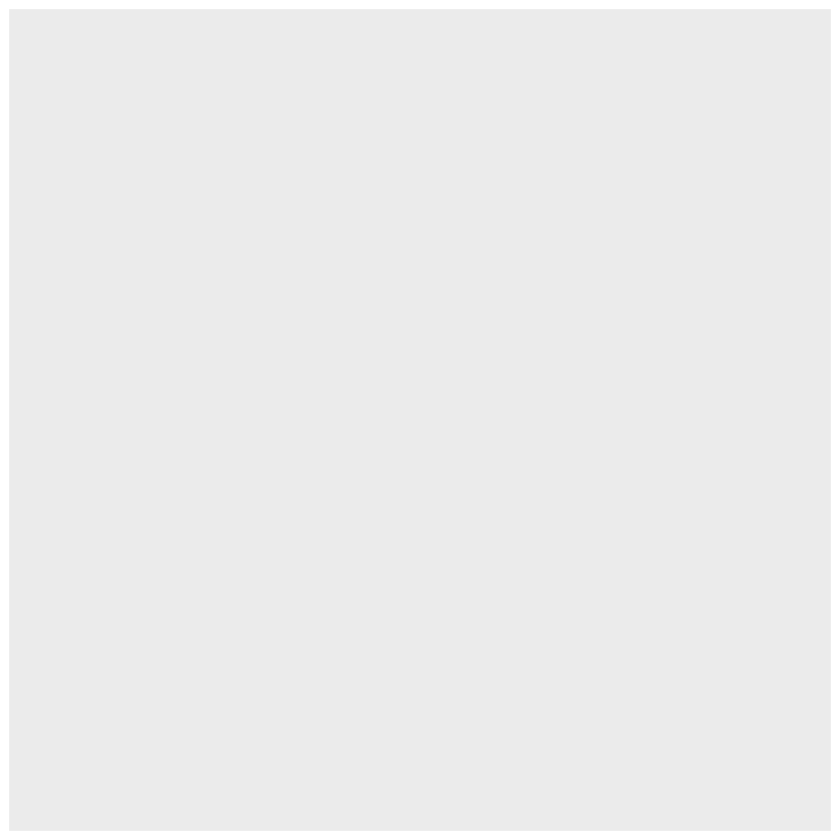

In [ ]:
ggplot(data = rendim2020)

Para obtener información, uno debe decidir que tipo de gráfico quiere hacer, usualmente asociado al tipo de dato con el que quiere trabajar. Esos son los geomas y los más importantes son los siguientes:

*   **geom_bar()**, nos entrega un gráfico de barras.
*   **geom_point()**, observamos un gráfico de puntos.
*   **geom_line()**, nos entrega un gráfico de lineas.
*   **geom_boxplot()**, un gráfico de cajas.
*   Entre otros.

Una vez seleccionado el  tipo de gráfico que queremos ver, mapeamos la variable que nos interesa.



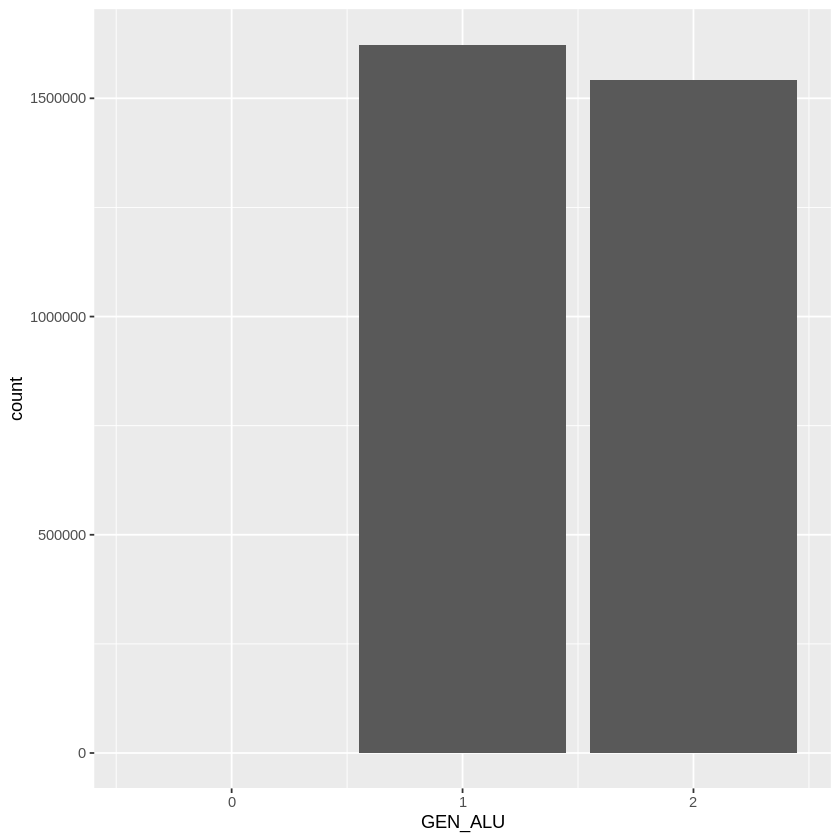

In [ ]:
ggplot(data = rendim2020) + geom_bar( mapping = aes(x = GEN_ALU))

Como vemos, al seleccionar un gráfico de barras automaticamente obtengo la cantidad de alumnos que tiene cada variable. Pero, ¿Es necesariamente esta la forma en que queremos presentar esta variable?

Ante la necesidad de decir más cosas con los gráficos, aparecen los estadísticos (stats). La modificación de estos, y su combinación con geomas, amplian nuestras opciones para graficar y visualizar la información de nuestra base de datos. Por ejemplo, podemos ver la proporción de cada sexo.

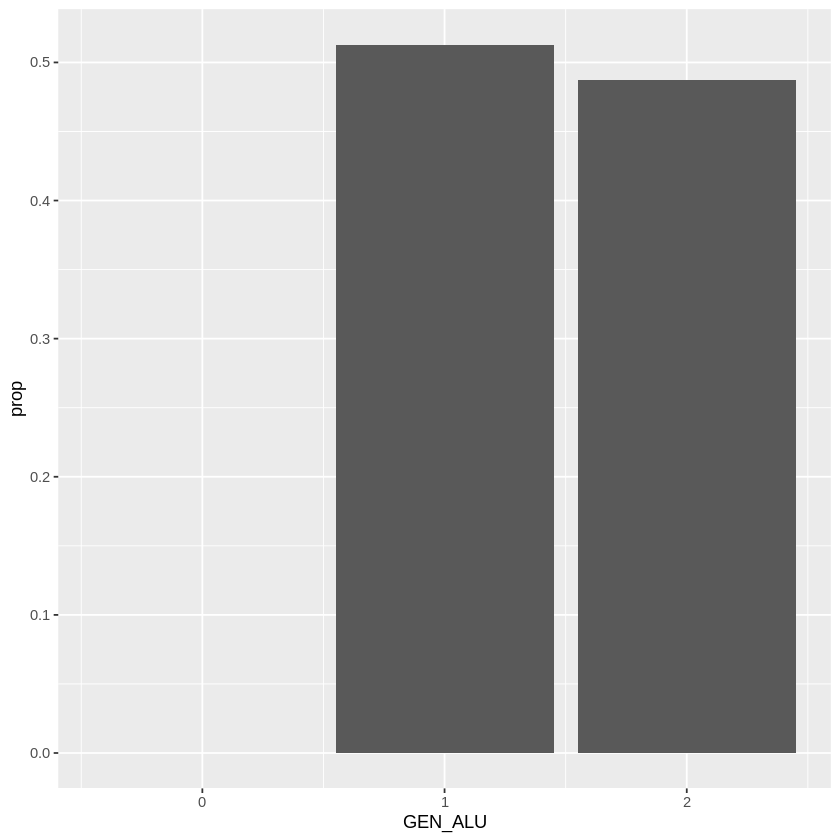

In [ ]:
ggplot(data = rendim2020) + geom_bar( mapping = aes(x = GEN_ALU, y = after_stat(prop)))

Parte importante del trabajo de gráficos, es que el sistema de coordenadas sea el correcto para poder hacer un análisis o presentar la información. para lograrlo, en ggplot agregamos la capa de funciones de coordenadas.

Dentro de las opciones que tienen estas funciones está el elegir los límites de los ejes, invertir el eje x y el eje y, seleccionar coordenadas polares o hasta trabajar con mapas de acuerdo a latitud y longitud.




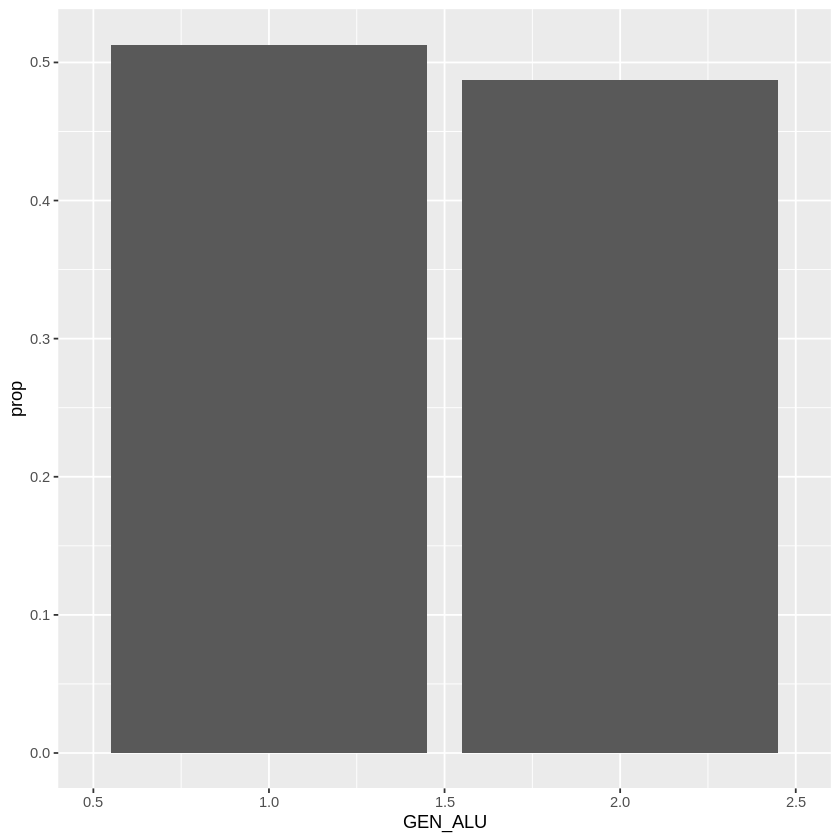

In [ ]:
ggplot(data = rendim2020) + geom_bar( mapping = aes(x = GEN_ALU, y = after_stat(prop), ))+
  coord_cartesian(xlim = c(0.5, 2.5))  

Una vez obtenido el gráfico, podemos buscar tener más información. Por ejemplo, ¿Cómo sería la distribución de genero por tipo de establecimiento?

Ante la necesidad de agregar una nueva variable, tenemos tres alternativas para lograr mejores visualizaciones, los comandos de posición, las estéticas (aes) y las facetas.

Los comandos de posición y las estéticas son formas de incluir más información dentro del mismo gráfico, cambiando los tamaños, colores y formas de los geomas. Por ejemplo, podemos ver la proporción de hombres y mujeres de acuerdo al tipo de establecimiento.

In [ ]:
rendim2020$COD_DEPE2 <- as.character(rendim2020$COD_DEPE2)

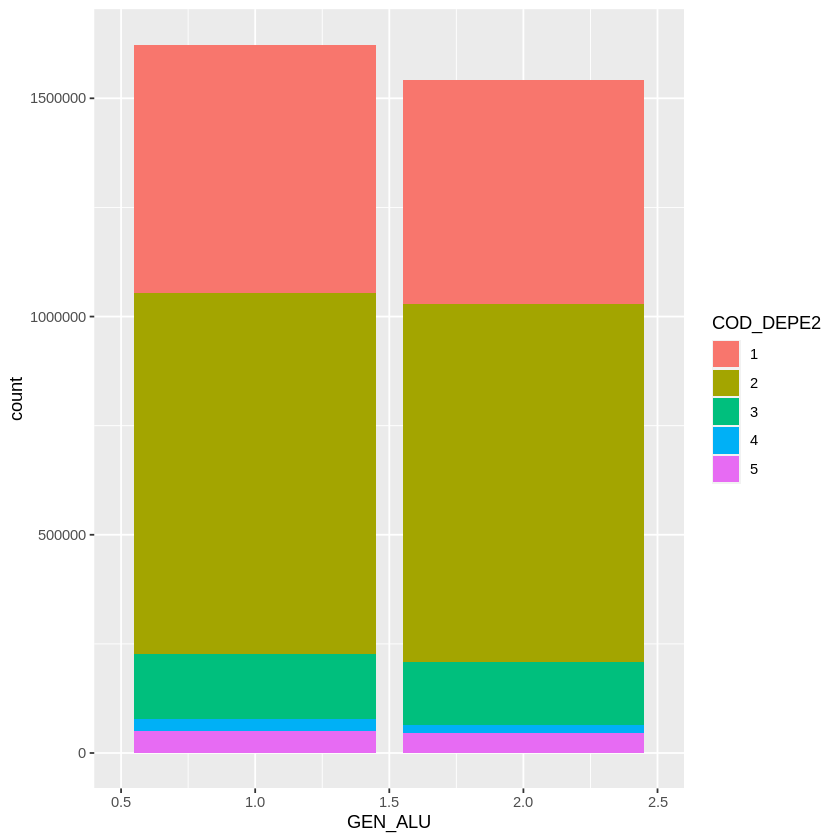

In [ ]:
ggplot(data = rendim2020) + geom_bar( mapping = aes(x = GEN_ALU, fill = COD_DEPE2))+
  coord_cartesian(xlim = c(0.5, 2.5)) 

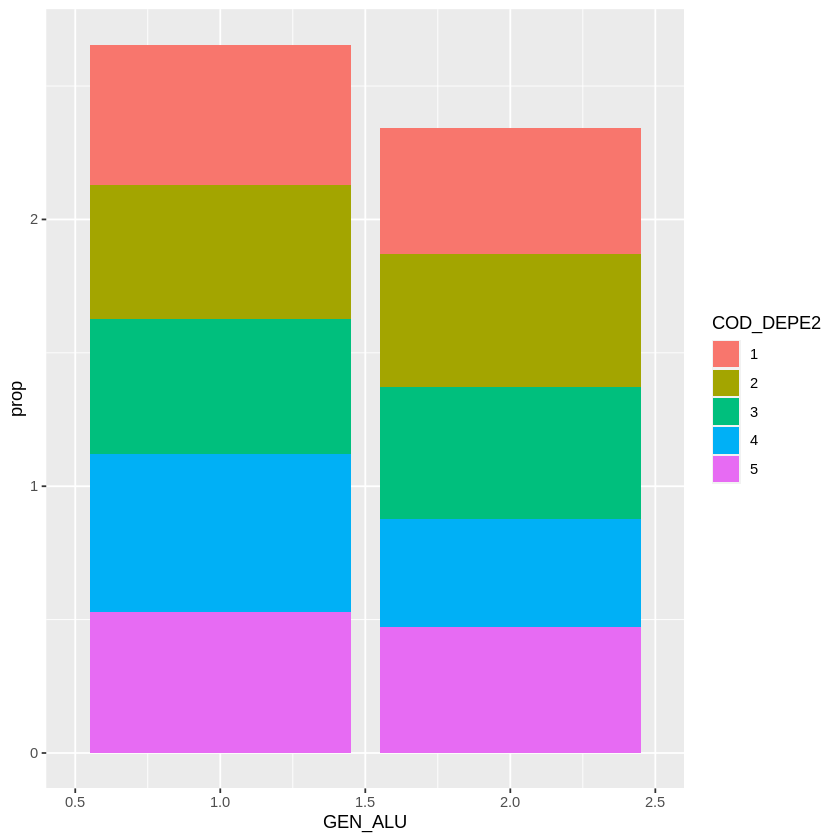

In [ ]:
ggplot(data = rendim2020) + geom_bar( mapping = aes(x = GEN_ALU, y = after_stat(prop), fill = COD_DEPE2))+
  coord_cartesian(xlim = c(0.5, 2.5))  

Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


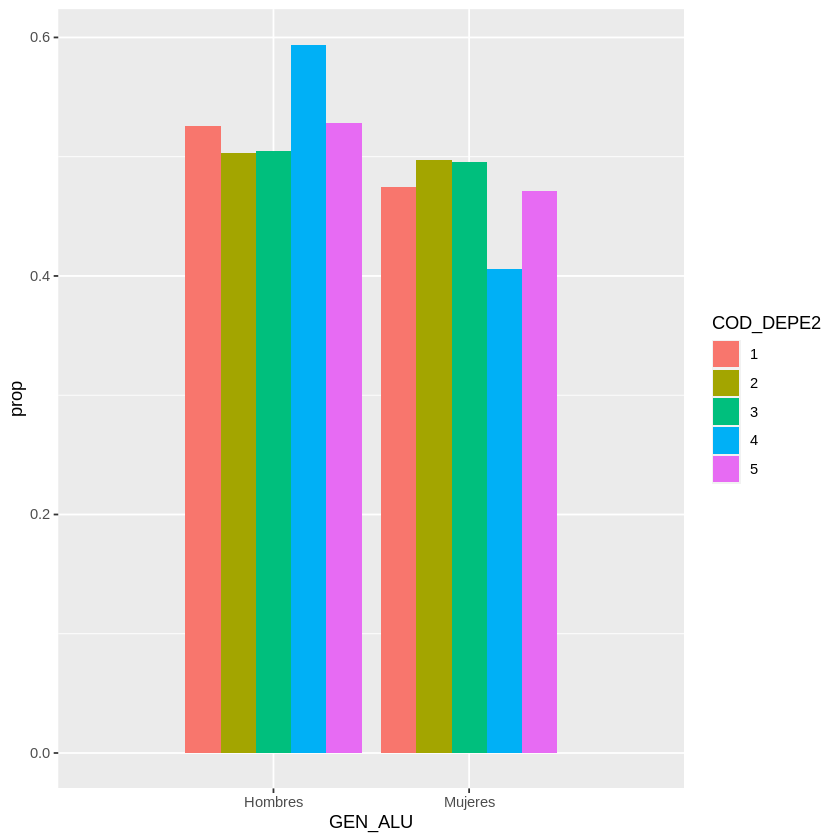

In [ ]:
ggplot(data = rendim2020) + geom_bar( mapping = aes(x = GEN_ALU, y = after_stat(prop), fill = COD_DEPE2), position = "dodge")+
  coord_cartesian(xlim = c(0.5, 2.5)) + scale_x_discrete(limits = c(1,2),
                   labels = c("Hombres", "Mujeres"))
 

Ahora, las facetas implican generar subgráficos que entregan la información fijada respecto a un valor Con ello, podemos comparar valores de acuerdo a una variable de control.

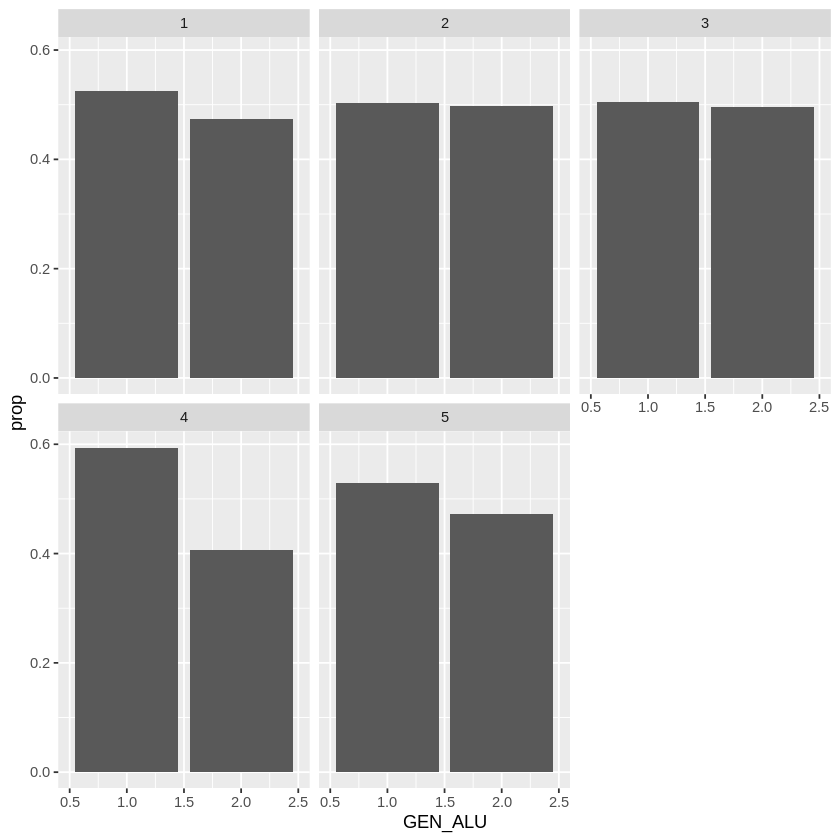

In [ ]:
ggplot(data = rendim2020) + geom_bar( mapping = aes(x = GEN_ALU, y = after_stat(prop), ))+
  coord_cartesian(xlim = c(0.5, 2.5))  + facet_wrap(~ COD_DEPE2, nrow = 2)

## **Unir dos bases de datos**

---



---


Para poder realizar un trabajo más completo, unir bases de datos es fundamental. Para ello uno busca llaves que permitan asociar las distintas bases de datos.

Para esta sección deberán usar los comandos de R para programar un "merge" según el mrun para las bases de datos de rendimiento del año 2019 y 2020. En otras palabras, buscaremos escribir en una sola base de datos los atributos de "rendim2019" y "rendim2020" para los valores de mrun que se encuentren en ambas bases de datos.

Para ello deberan seguir los siguientes pasos:

1) Descargar y asignar las bases de datos de rendimiento escolar de los años 2019 y 2020 a las variables rendim2019 y rendim2020

2) Crear un dataframe vacio "rendim_19_20" con las columnas de rendim2019 y rendim2020, notese que los atributos se llaman de la misma forma en las dos bases de datos asi que deberán poner un sufijo a cada uno (ej: COD_GRADO_2019, COD_GRADO_2020, etc). Para esto investiguen como se ocupa la funcion "paste".

3) Elaboren un codigo para llenar la base de datos rendim_19_20 con los atributos de los años 2019 y 2020. Para la solución más sencilla será necesario que usen 2 for-loop y un if. En este codigo recorran solo las 3000 primeras filas de las bases de datos (por temas de tiempo de computo). Tomen el tiempo con la libreria tictoc.

4) Busquen como utilizar la funcion "merge" de R-base y de dplyr, hagan lo mismo del los pasos 1-3 pero con estas librerias. Tomen el tiempo con la libreria tictoc.



In [ ]:
rendim2019 <- fread("/content/content/Datos/20210223_Rendimiento_2019.csv")
str(rendim2019)

Classes ‘data.table’ and 'data.frame':	3328915 obs. of  37 variables:
 $ AGNO          : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ RBD           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DGV_RBD       : int  9 9 9 9 9 9 9 9 9 9 ...
 $ NOM_RBD       : chr  "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" ...
 $ COD_REG_RBD   : int  15 15 15 15 15 15 15 15 15 15 ...
 $ NOM_REG_RBD_A : chr  "AYP" "AYP" "AYP" "AYP" ...
 $ COD_PRO_RBD   : int  151 151 151 151 151 151 151 151 151 151 ...
 $ COD_COM_RBD   : int  15101 15101 15101 15101 15101 15101 15101 15101 15101 15101 ...
 $ NOM_COM_RBD   : chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPROV_RBD: int  151 151 151 151 151 151 151 151 151 151 ...
 $ NOM_DEPROV_RBD: chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPE      : int  6 6 6 6 6 6 6 6 6 6 ...
 $ COD_DEPE2     : int  5 5 5 5 5 5 5 5 5 5 ...
 $ RURAL_RBD     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ESTADO_ESTAB  : int  1 

Para combinar ambas bases de datos, queremos todos aquellos que tengan el mismo MRUN, por lo que recorreremos la 2019 y crearemos una base de datos a la que sumamos todas las observaciones que esten en ambas bases de datos. Para evaluar nuestro método, medimos cuánto tiempo se demora con la librería tictoc.

In [ ]:
columnas2019 <- paste(names(rendim2019), "2019", sep = "_")
columnas2020 <- paste(names(rendim2020), "2020", sep = "_")


rendim_19_20 <- data.frame(matrix(ncol = 74, nrow = 0))
nombres_columnas <- c(columnas2019, columnas2020)
colnames(rendim_19_20) <- nombres_columnas

In [ ]:
rendim_19_20

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


AGNO_2019,RBD_2019,DGV_RBD_2019,NOM_RBD_2019,COD_REG_RBD_2019,NOM_REG_RBD_A_2019,COD_PRO_RBD_2019,COD_COM_RBD_2019,NOM_COM_RBD_2019,COD_DEPROV_RBD_2019,⋯,COD_COM_ALU_2020,NOM_COM_ALU_2020,COD_RAMA_2020,COD_SEC_2020,COD_ESPE_2020,PROM_GRAL_2020,ASISTENCIA_2020,SIT_FIN_2020,SIT_FIN_R_2020,COD_MEN_2020
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>


In [ ]:
install.packages("tictoc")
library("tictoc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
tic()

ciclo1 <- 3000
ciclo2 <- 3000
n <- 1

for(i in 1:ciclo1){
  mrun <- rendim2019$MRUN[i]
  for(j in 1:ciclo2){
    mrun2 <- rendim2020$MRUN[j]
    if(mrun == mrun2){
      fila <- c(as.character(rendim2019[i,]), as.character(rendim2020[j,]))
      rendim_19_20[n, ] <- fila
      n <- n+1
    }
  }
}



toc()



16.091 sec elapsed


In [ ]:
str(rendim_19_20)

'data.frame':	1930 obs. of  74 variables:
 $ AGNO_2019          : chr  "2019" "2019" "2019" "2019" ...
 $ RBD_2019           : chr  "1" "1" "1" "1" ...
 $ DGV_RBD_2019       : chr  "9" "9" "9" "9" ...
 $ NOM_RBD_2019       : chr  "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" ...
 $ COD_REG_RBD_2019   : chr  "15" "15" "15" "15" ...
 $ NOM_REG_RBD_A_2019 : chr  "AYP" "AYP" "AYP" "AYP" ...
 $ COD_PRO_RBD_2019   : chr  "151" "151" "151" "151" ...
 $ COD_COM_RBD_2019   : chr  "15101" "15101" "15101" "15101" ...
 $ NOM_COM_RBD_2019   : chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPROV_RBD_2019: chr  "151" "151" "151" "151" ...
 $ NOM_DEPROV_RBD_2019: chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPE_2019      : chr  "6" "6" "6" "6" ...
 $ COD_DEPE2_2019     : chr  "5" "5" "5" "5" ...
 $ RURAL_RBD_2019     : chr  "0" "0" "0" "0" ...
 $ ESTADO_ESTAB_2019  : chr  "1" "1" "1" "1" ...
 $ COD_ENSE_2019      : chr  "463" "463" "463" 

Se demoró casi 20 segundos recorriendo solo los primeros 3.000 elementos de cada base de datos. 



Como vemos, este algoritmo no es necesariamente el más eficiente. Por suerte, R tiene implementado la unión de dos bases de datos.

In [ ]:
tic()
rendim_19_20 <- merge(rendim2019, rendim2020, by = "MRUN", all = FALSE)
toc()



7.493 sec elapsed


In [ ]:
str(rendim_19_20)

Classes ‘data.table’ and 'data.frame':	3040321 obs. of  73 variables:
 $ MRUN            : int  25 26 47 48 48 86 87 88 89 98 ...
 $ AGNO.x          : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ RBD.x           : int  14606 25509 11240 2151 20364 3999 18237 10506 2308 31161 ...
 $ DGV_RBD.x       : int  4 2 2 2 5 3 0 6 6 8 ...
 $ NOM_RBD.x       : chr  "COLEGIO PUERTO PAZ" "COLEGIO PARTICULAR MARÍA AUXILIADORA DE SANTIAGO" "ESCUELA SAN GABRIEL DE LA RIVERA" "COLEGIO PARTICULAR SANTA MARIA" ...
 $ COD_REG_RBD.x   : int  5 13 5 6 6 16 8 13 6 13 ...
 $ NOM_REG_RBD_A.x : chr  "VALPO" "RM" "VALPO" "LGBO" ...
 $ COD_PRO_RBD.x   : int  51 131 55 61 61 161 81 132 61 131 ...
 $ COD_COM_RBD.x   : int  5101 13101 5502 6101 6101 16107 8108 13201 6115 13111 ...
 $ NOM_COM_RBD.x   : chr  "VALPARAÍSO" "SANTIAGO" "CALERA" "RANCAGUA" ...
 $ COD_DEPROV_RBD.x: int  53 131 51 61 61 81 83 136 61 132 ...
 $ NOM_DEPROV_RBD.x: chr  "VALPARAÍSO" "SANTIAGO CENTRO" "QUILLOTA" "CACHAPOAL" ...
 $

Vemos como el tiempo se redujo a la mitad, al mismo tiempo que realizamos un análisis de la base completa.

Y esto lo podemos realizar de forma aún más rápida utilizando librerías, como hemos visto anteriormente.

In [ ]:
library(dplyr)

In [ ]:
tic()
rendim_19_20 <- inner_join(rendim2019, rendim2020, by = "MRUN", suffix = c(".2019", ".2020"))

toc()

4.142 sec elapsed


In [ ]:
str(rendim_19_20)

Classes ‘data.table’ and 'data.frame':	3040321 obs. of  73 variables:
 $ AGNO.2019          : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ RBD.2019           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DGV_RBD.2019       : int  9 9 9 9 9 9 9 9 9 9 ...
 $ NOM_RBD.2019       : chr  "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" ...
 $ COD_REG_RBD.2019   : int  15 15 15 15 15 15 15 15 15 15 ...
 $ NOM_REG_RBD_A.2019 : chr  "AYP" "AYP" "AYP" "AYP" ...
 $ COD_PRO_RBD.2019   : int  151 151 151 151 151 151 151 151 151 151 ...
 $ COD_COM_RBD.2019   : int  15101 15101 15101 15101 15101 15101 15101 15101 15101 15101 ...
 $ NOM_COM_RBD.2019   : chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPROV_RBD.2019: int  151 151 151 151 151 151 151 151 151 151 ...
 $ NOM_DEPROV_RBD.2019: chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPE.2019      : int  6 6 6 6 6 6 6 6 6 6 ...
 $ COD_DEPE2.2019     : int  5 5 5 5 5 5 5 5 5 5 ...
 $ RURAL_

La unión que hemos realizado hasta aquí es una unión del tipo inner join o intersección. Este tipo de unión entrega todos los valores que se encuentren en ambas bases de datos.

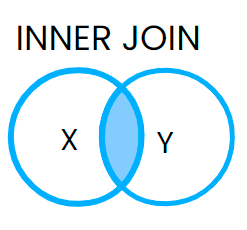

La librería dplyr nos permite una gran variedad de uniones, mediante comandos esencialmente iguales: **inner_join()**, **full_join()**, **left_join()**, **right_join()** 


El comando debe ser utilizado de la siguiente forma:

inner_join(x, y, by = NULL, copy = FALSE, suffix = c(".x", ".y"))

con $x, y$ las bases de datos.

$by$ es la(s) llave(s) con las que uno une ambas bases de datos. En caso de que las llaves se llamen diferente en cada base de datos, se utiliza un vector $by = c($"llave x" $=$ "llave y"$)$

$suffix$ uno determina el sufijo que deban llevar las columnas repetidas, en caso de que las haya.

Los outer join, que en la librería se obtienen con el comando full_join(), nos entregan todos los elementos de ambas bases de datos, uniendo aquellos en que se intersecten

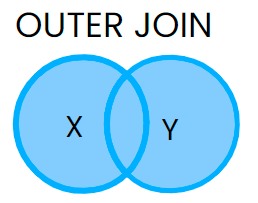

In [ ]:
tic()
rendim_19_20 <- full_join(rendim2019, rendim2020, by = "MRUN")
toc()

6.306 sec elapsed


In [ ]:
str(rendim_19_20)

Classes ‘data.table’ and 'data.frame':	3745866 obs. of  73 variables:
 $ AGNO.x          : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ RBD.x           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DGV_RBD.x       : int  9 9 9 9 9 9 9 9 9 9 ...
 $ NOM_RBD.x       : chr  "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" ...
 $ COD_REG_RBD.x   : int  15 15 15 15 15 15 15 15 15 15 ...
 $ NOM_REG_RBD_A.x : chr  "AYP" "AYP" "AYP" "AYP" ...
 $ COD_PRO_RBD.x   : int  151 151 151 151 151 151 151 151 151 151 ...
 $ COD_COM_RBD.x   : int  15101 15101 15101 15101 15101 15101 15101 15101 15101 15101 ...
 $ NOM_COM_RBD.x   : chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPROV_RBD.x: int  151 151 151 151 151 151 151 151 151 151 ...
 $ NOM_DEPROV_RBD.x: chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPE.x      : int  6 6 6 6 6 6 6 6 6 6 ...
 $ COD_DEPE2.x     : int  5 5 5 5 5 5 5 5 5 5 ...
 $ RURAL_RBD.x     : int  0 0 0 0 0 0 0 0 0 0 ..

Por su parte, left_join() nos retorna la intersección de las bases, y todas las filas de la base x que no tienen fila correspondiente en la base y, como vemos en la imagen.

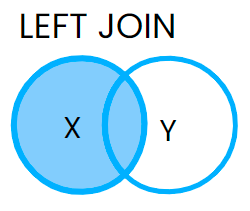




In [ ]:
tic()
rendim_19_20 <- left_join(rendim2019, rendim2020, by = "MRUN")
toc()

3.932 sec elapsed


In [ ]:
str(rendim_19_20)

Classes ‘data.table’ and 'data.frame':	3413440 obs. of  73 variables:
 $ AGNO.x          : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ RBD.x           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DGV_RBD.x       : int  9 9 9 9 9 9 9 9 9 9 ...
 $ NOM_RBD.x       : chr  "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" ...
 $ COD_REG_RBD.x   : int  15 15 15 15 15 15 15 15 15 15 ...
 $ NOM_REG_RBD_A.x : chr  "AYP" "AYP" "AYP" "AYP" ...
 $ COD_PRO_RBD.x   : int  151 151 151 151 151 151 151 151 151 151 ...
 $ COD_COM_RBD.x   : int  15101 15101 15101 15101 15101 15101 15101 15101 15101 15101 ...
 $ NOM_COM_RBD.x   : chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPROV_RBD.x: int  151 151 151 151 151 151 151 151 151 151 ...
 $ NOM_DEPROV_RBD.x: chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPE.x      : int  6 6 6 6 6 6 6 6 6 6 ...
 $ COD_DEPE2.x     : int  5 5 5 5 5 5 5 5 5 5 ...
 $ RURAL_RBD.x     : int  0 0 0 0 0 0 0 0 0 0 ..

Finalmente, right_join() nos entrega la intersección de las bases, y todas las filas de la base y que no tienen fila correspondiente en la base x.

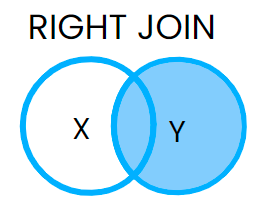

In [ ]:
tic()
rendim_19_20 <- right_join(rendim2019, rendim2020, by = "MRUN")
toc()

4.522 sec elapsed


In [ ]:
str(rendim_19_20)

Classes ‘data.table’ and 'data.frame':	3372747 obs. of  73 variables:
 $ AGNO.x          : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ RBD.x           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ DGV_RBD.x       : int  9 9 9 9 9 9 9 9 9 9 ...
 $ NOM_RBD.x       : chr  "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" "LICEO POLITECNICO ARICA" ...
 $ COD_REG_RBD.x   : int  15 15 15 15 15 15 15 15 15 15 ...
 $ NOM_REG_RBD_A.x : chr  "AYP" "AYP" "AYP" "AYP" ...
 $ COD_PRO_RBD.x   : int  151 151 151 151 151 151 151 151 151 151 ...
 $ COD_COM_RBD.x   : int  15101 15101 15101 15101 15101 15101 15101 15101 15101 15101 ...
 $ NOM_COM_RBD.x   : chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPROV_RBD.x: int  151 151 151 151 151 151 151 151 151 151 ...
 $ NOM_DEPROV_RBD.x: chr  "ARICA" "ARICA" "ARICA" "ARICA" ...
 $ COD_DEPE.x      : int  6 6 6 6 6 6 6 6 6 6 ...
 $ COD_DEPE2.x     : int  5 5 5 5 5 5 5 5 5 5 ...
 $ RURAL_RBD.x     : int  0 0 0 0 0 0 0 0 0 0 ..

## **Analizando datos (Actividad)**
1.   Planteen al menos 3 hipotesis que ustedes crean acertadas en base a los datos de rendimiento escolar.
2.   Limpien la base de datos de manera adecuada para cada una de las hipotesis.
3.   Contrasten cada una de las hipotesis con datos y graficas adecuadas.



### Ejemplo de hipotesis:

1. El promedio general va bajando a lo largo de los años (incluyendo educación básica y media)

Para probar esto necesitamos: notas generales, codigo de grado, codigo de enseñanza (2, es más fácil)

In [ ]:
library(dplyr)

In [ ]:
db=filter(rendim2020[,c("COD_GRADO","COD_ENSE2", "PROM_GRAL")], (COD_ENSE2==2 | COD_ENSE2==5) & PROM_GRAL!=0)

In [ ]:
db$PROM_GRAL<-as.numeric(sub(",", ".", db$PROM_GRAL, fixed = TRUE)) 


In [ ]:
str(db)

Classes ‘data.table’ and 'data.frame':	2683490 obs. of  3 variables:
 $ COD_GRADO: int  1 1 1 1 1 1 1 1 1 1 ...
 $ COD_ENSE2: int  5 5 5 5 5 5 5 5 5 5 ...
 $ PROM_GRAL: num  6.7 6.4 6.9 6.5 6.6 6.8 6.8 6.6 6.9 6.7 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [ ]:
promedios <- db %>% group_by(COD_ENSE2,COD_GRADO) %>% summarise(promedio = mean(PROM_GRAL)) 

`summarise()` has grouped output by 'COD_ENSE2'. You can override using the `.groups` argument.



In [ ]:
promedios

COD_ENSE2,COD_GRADO,promedio
<int>,<int>,<dbl>
2,1,6.337835
2,2,6.343821
2,3,6.260556
2,4,6.211609
2,5,6.058204
2,6,5.973103
2,7,5.847909
2,8,5.849369
5,1,5.772608


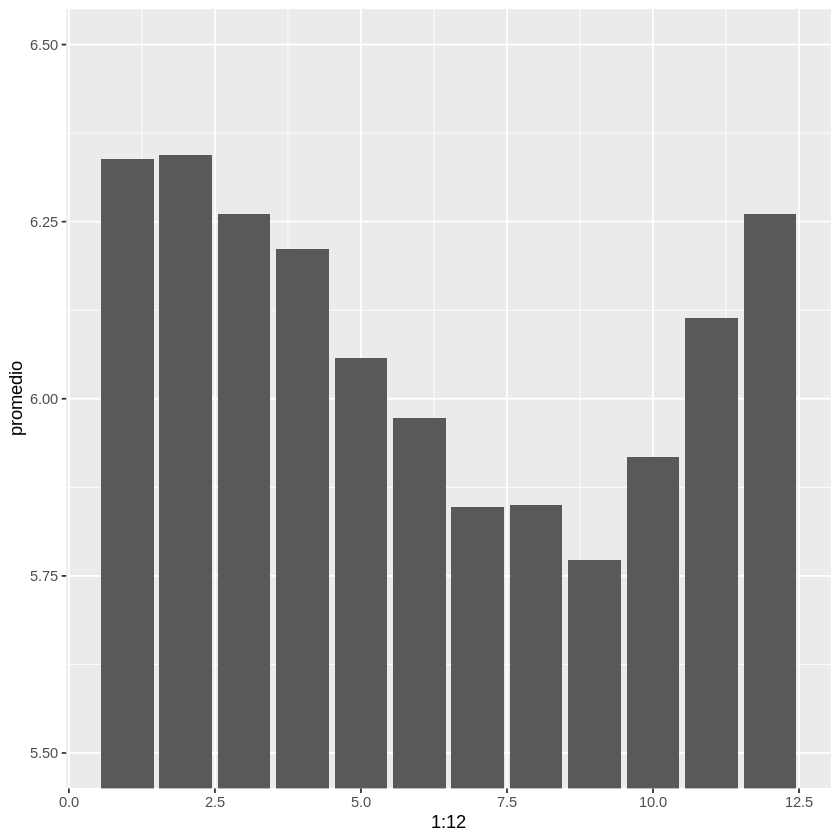

In [ ]:
p<-ggplot(data=promedios) +
  geom_bar(stat="identity", aes(x=1:12, y=promedio))+
  coord_cartesian(ylim = c(5.5, 6.5))  

p
   